In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("/Users/kshitijdua/PycharmProjects/pythonProject/TU_Graz/speeddating.csv")

In [3]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


In [4]:
df.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


In [5]:
df.has_null.unique()

array(["b''"], dtype=object)

In [6]:
df.drop('has_null', axis = 1, inplace = True)

In [7]:
df.dtypes.value_counts()

object     63
float64    59
Name: count, dtype: int64

In [9]:
category_columns = df.select_dtypes('object')

In [10]:
category_columns

,gender,d_d_age,race,race_o,samerace,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,...,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,b'female',b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[16-20]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'0',b'0'
1,b'female',b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'0',b'0'
2,b'female',b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',b'[2-5]',b'[2-5]',b'Law',b'[16-20]',b'[16-20]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[0-4]',b'1',b'1',b'1'
3,b'female',b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'1',b'1'
4,b'female',b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',b'[2-5]',b'[2-5]',b'Law',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'male',b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',b'[0-1]',b'[0-1]',b'Climate Dynamics',b'[0-15]',b'[0-15]',...,b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]',b'0',b'1',b'0'
8374,b'male',b'[0-1]',b'European/Caucasian-American',b'Other',b'0',b'[0-1]',b'[0-1]',b'Climate Dynamics',b'[21-100]',b'[16-20]',...,b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[0-4]',b'0',b'0',b'0'
8375,b'male',b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',b'[0-1]',b'[0-1]',b'Climate Dynamics',b'[21-100]',b'[0-15]',...,b'[0-5]',b'[-1-0]',b'[7-10]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]',b'0',b'0',b'0'
8376,b'male',b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',b'[0-1]',b'[0-1]',b'Climate Dynamics',b'[0-15]',b'[21-100]',...,b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]',b'0',b'1',b'0'


In [11]:
CoulmnToEncode = ['gender','race','race_o','samerace','field','decision','decision_o','match']

In [12]:
labenc = LabelEncoder()

In [13]:
for feature in CoulmnToEncode:
    try:
      df[feature] = labenc.fit_transform(df[feature])
    except:
      print('Error encoding '+feature)

In [14]:
df.dtypes.value_counts()

float64    59
object     55
int64       8
Name: count, dtype: int64

In [15]:
category_columns = df.select_dtypes(include='object').columns

# Drop the selected columns
df.drop(columns=category_columns, axis =1 , inplace= True)

In [16]:
df.dtypes.value_counts()

float64    59
int64       8
Name: count, dtype: int64

In [17]:
df.head()

,wave,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,1.0,0,21.0,27.0,6.0,1,3,0,2.0,4.0,...,0.14,3.0,2.0,4.0,7.0,6.0,0.0,1,0,0
1,1.0,0,21.0,22.0,1.0,1,3,0,2.0,4.0,...,0.54,3.0,2.0,4.0,7.0,5.0,1.0,1,0,0
2,1.0,0,21.0,22.0,1.0,1,1,1,2.0,4.0,...,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1,1,1
3,1.0,0,21.0,23.0,2.0,1,3,0,2.0,4.0,...,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1,1,1
4,1.0,0,21.0,24.0,3.0,1,4,0,2.0,4.0,...,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1,1,1


In [22]:
duplicate_rows = df[df.duplicated()]

In [23]:
duplicate_rows

,wave,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match


In [24]:
null_Columns = df.isnull().sum()

In [25]:
null_count_per_column = null_Columns[null_Columns > 0]

In [26]:
null_count_per_column

age                                95
age_o                             104
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive                        105
sincere                           105
intelligence                      105
funny                             105
ambition    

In [27]:
df.drop("expected_num_interested_in_me", axis = 1, inplace = True)

In [28]:
new_data = df.copy(deep = True)

In [29]:
imputer = KNNImputer(n_neighbors = 5)
new_data = pd.DataFrame(imputer.fit_transform(new_data), columns=new_data.columns)


In [30]:
new_data.isnull().sum().sum()

0

In [31]:
correlation_matrix = new_data.corr()
correlation_matrix = correlation_matrix[(correlation_matrix.abs() > 0.5) | (correlation_matrix.abs() < -0.5)]


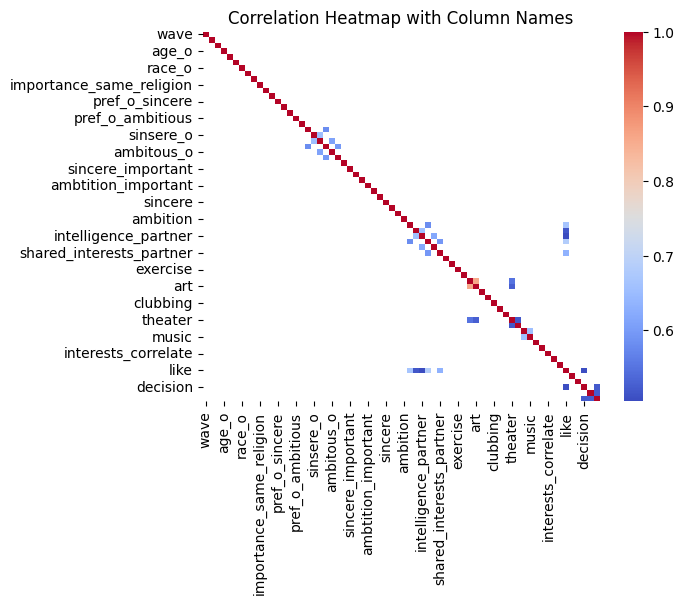

In [32]:

# Customize plot

sns.heatmap(correlation_matrix, cmap='coolwarm')

# Customize plot
plt.title('Correlation Heatmap with Column Names')
plt.show()

In [33]:
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

In [34]:
X = normalized_data.drop(['match', 'decision', 'decision_o'], axis=1)
y = normalized_data['match']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print( " Model Evaluation: mean_squared_error is ", mean_squared_error(y_test,y_pred))

Accuracy: 0.7696897374701671


In [51]:
pca = PCA(n_components=16)  # Set the desired number of components
X_pca = pca.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [55]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print( "Mean Square Error is ", mean_squared_error(y_test,y_pred))

Accuracy: 0.7547732696897375
Mean Square Error is  0.24522673031026254


In [75]:

loadings = pca.components_

# Create a DataFrame to visualize the loadings
loadings_df = pd.DataFrame(loadings, columns=X.columns)


# Display the loadings DataFrame
print("IMPORTANT FEATURES")

for i in range(3):
    # Find the feature with the highest absolute loading for each principal component
    important_feature = loadings_df.iloc[i].abs().idxmax()
    print(f"Feature {i+1}: {important_feature}")
important_feature = loadings_df.iloc[5].abs().idxmax()
print(f"Feature {4}: {important_feature}")
important_feature = loadings_df.iloc[6].abs().idxmax()
print(f"Feature {5}: {important_feature}")
important_feature = loadings_df.iloc[11].abs().idxmax()
print(f"Feature {6}: {important_feature}")




IMPORTANT FEATURES
Feature 1: gender
Feature 2: samerace
Feature 3: tvsports
Feature 4: sports
Feature 5: importance_same_religion
Feature 6: clubbing
